In [1]:
# Mengimpor library yang dibutuhkan
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path='/content/drive/MyDrive/datasets/datasets kendaraan/saved models'

In [9]:
# Memuat model yang telah disimpan dalam format .h5
model = tf.keras.models.load_model(path+'/model_vgg16.h5')

In [10]:
# Mendefinisikan kelas target
class_names = ['motor', 'mobil']

In [11]:
# Mendefinisikan path ke folder yang berisi gambar
img_folder ='/content/drive/MyDrive/vgg16/testing/mobil'

In [12]:
# Mendapatkan daftar nama file pada folder
img_files = os.listdir(img_folder)

In [13]:
# Memilih 3 gambar secara acak dari folder
img_files = np.random.choice(img_files, size=1, replace=False)

In [14]:
# Menampilkan gambar dan hasil prediksi untuk setiap gambar
for img_file in img_files:
    # Memuat gambar
    img_path = os.path.join(img_folder, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))

    # Mengubah gambar menjadi array numpy
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Melakukan prediksi menggunakan model
    predictions = model.predict(img_array)

    # Mengambil indeks kelas dengan probabilitas tertinggi
    predicted_class = np.argmax(predictions[0])

1/1 [==============================] - 1s 959ms/step


Hasil prediksi untuk gambar 6.jpg adalah: motor


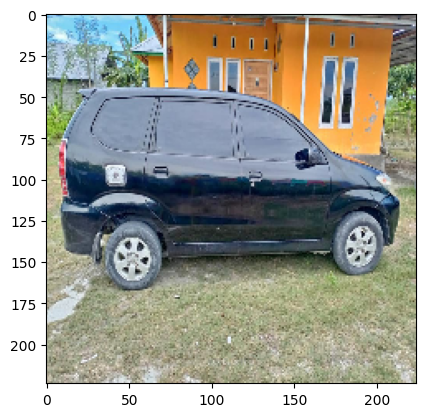

In [15]:
# Menampilkan hasil prediksi
print("Hasil prediksi untuk gambar {} adalah: {}".format(img_file, class_names[predicted_class]))
plt.imshow(img)
plt.show()